<a href="https://colab.research.google.com/github/AritraaBhattacharyya/Holiday_Package_Prediction/blob/main/Holiday_Package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aritra Bhattacharyya
#60009210154
#CSE(Data Science-B (B1))


---



In [ ]:
import numpy as np
import pandas as pd

#Loading the Dataset

---



In [ ]:
data=pd.read_csv("/content/Travel.csv")
data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


#Data Preprocessing

---



Handling the null values:

In [ ]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

Filling the null values of the numeric features with the mean value.

In [ ]:
a=data["Age"].mean()
data["Age"].fillna(value=a,inplace=True)

b=data["DurationOfPitch"].mean()
data["DurationOfPitch"].fillna(value=b,inplace=True)

c=data["MonthlyIncome"].mean()
data["MonthlyIncome"].fillna(value=c,inplace=True)

In [ ]:
data.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
TypeofContact                25
CityTier                      0
DurationOfPitch               0
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome                 0
dtype: int64

Filling the null values of the categorical features with the most frequent value.

In [ ]:
data=data.fillna(data.mode().iloc[0])

In [ ]:
data.isnull().sum()

CustomerID                  0
ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

#Data Visualization & Analysis

---



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Analysing the target variable distribution.

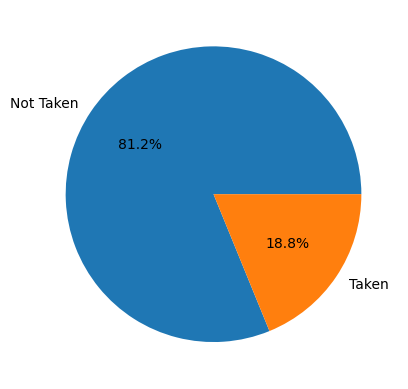

In [ ]:
plt.pie(data['ProdTaken'].value_counts(),labels=['Not Taken', 'Taken'],autopct='%0.1f%%')
plt.show()

Out of all the observations we have, only 18.8% of the customers end up buying the holiday package, taking all the variables into consideration.

To dive deeper into the visualization, we must know how every variable is related to the target variable. To check this, we plot a heatmap:

<Axes: >

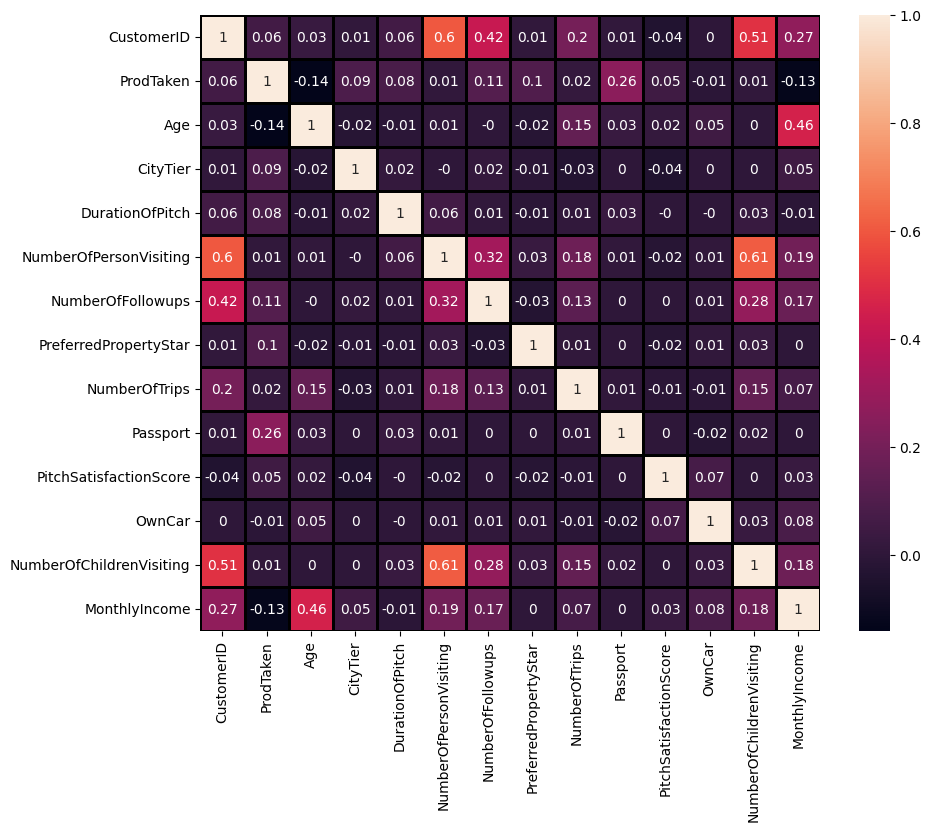

In [ ]:
nu = data.select_dtypes('number')
plt.figure(figsize = (10, 8))
sns.heatmap(nu.corr().round(2), annot = True, linewidth = 1, linecolor = 'black')

The heatmap above shows the correlation between all the variables. The  correlation between our target variable i.e whether the product is taken or not and other features can be observed.We observe that taking a product doesn't really depend on the following features:



*   age (coeffient of correlation= -0.14)
*   Monthly Income (coeffient of correlation= -0.13)

*   owning car (coeffient of correlation= -0.01)








On the other hand, taking a product does depend on features like:
 passport, Number of follow ups,Preffered property star,City Tier, Duration of

1.  Passport
2.   Number of follow ups
3.   Preffered property star
4.  City Tier
5.   Duration of Pitch
6.   Pitch satisfaction score
7. Number Of Trips
8. Number Of Person Visiting
9. Number of Chilren Visiting

Therefore, we further explore these features, along with features like Gender, Occupation,etc.

In [ ]:
data['TypeofContact'].replace(['Company Invited', 'Self Enquiry'],
                        [0, 1], inplace=True)

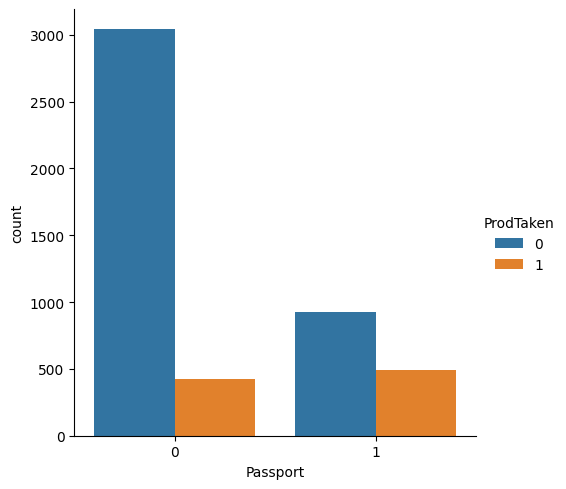

In [ ]:
sns.catplot(x='Passport',hue='ProdTaken',data=data,kind="count")




*   The factor of having a passport or not has the highest correlation with the target variable (coeffient of correlation=0.26).
*   There is a larger possibilty of the product not being taken when the customer doesn't have a passport.


*  Customers are seen to consider buying the package more when they have a passport






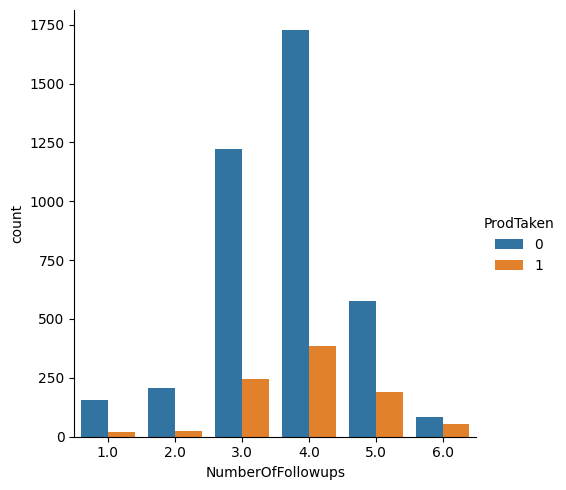

In [ ]:
sns.catplot(x='NumberOfFollowups',hue='ProdTaken',data=data,kind="count")

In [ ]:
import matplotlib.style as style
import matplotlib.ticker as mtick
import plotly.express as px

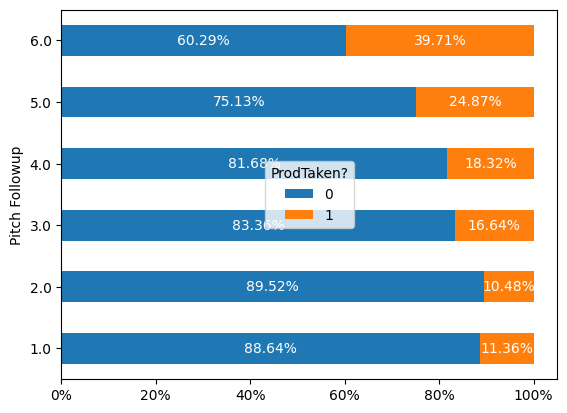

In [ ]:
g = data.groupby('NumberOfFollowups')['ProdTaken'].value_counts(normalize=True).unstack('ProdTaken').plot(kind='barh', stacked=True)
g.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
g.set_ylabel('Pitch Followup')
g.legend(loc='center', title = "ProdTaken?")

for p in g.patches:
    g.annotate(format(p.get_width(), '.2%'),
               xy = (p.get_x() + p.get_width() / 2,
                     p.get_y() + p.get_height() / 2,),
               ha = 'center',
               va = 'center',
               color = 'white'
              )

*   Most of the customers had followed up for 4 times.Naturally,most of the customers who ended up buying the product also fall in this category.
*   People visiting or enquiring only once or twice have mostly not bought the product.

*   People following up for 6 times have comparatively an improved percentage of taking the product.

Hence, a greater number of follow ups by customers has shown an increased possibility of the product being sold.

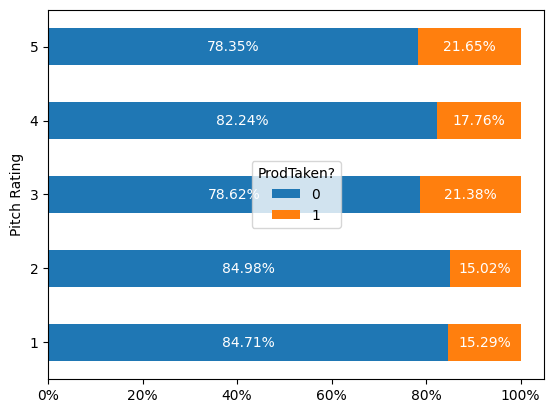

In [ ]:
g = data.groupby('PitchSatisfactionScore')['ProdTaken'].value_counts(normalize=True).unstack('ProdTaken').plot(kind='barh', stacked=True)
g.xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
g.set_ylabel('Pitch Rating')
g.legend(loc='center', title = "ProdTaken?")

for p in g.patches:
    g.annotate(format(p.get_width(), '.2%'),
               xy = (p.get_x() + p.get_width() / 2,
                     p.get_y() + p.get_height() / 2,),
               ha = 'center',
               va = 'center',
               color = 'white'
              )

It is seen that the Pitch satisfaction is not highly influencing the customers' decision. Higher pitch rate shows slightly higher possibility of the product being sold.

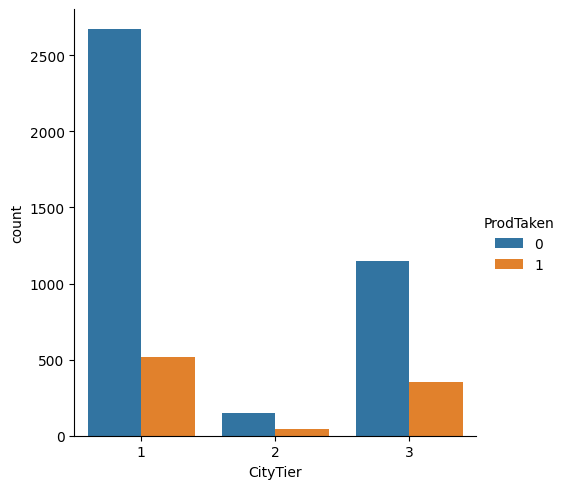

In [ ]:
sns.catplot(x='CityTier',hue='ProdTaken',data=data,kind="count")


* Most customers belong to city of tier 1.
* Least customers belong to city of tier 2.
*Ratio of Product taken to product not taken is the minimum for the customers from Tier 2 city and maximum for the Tier 1 city customers.

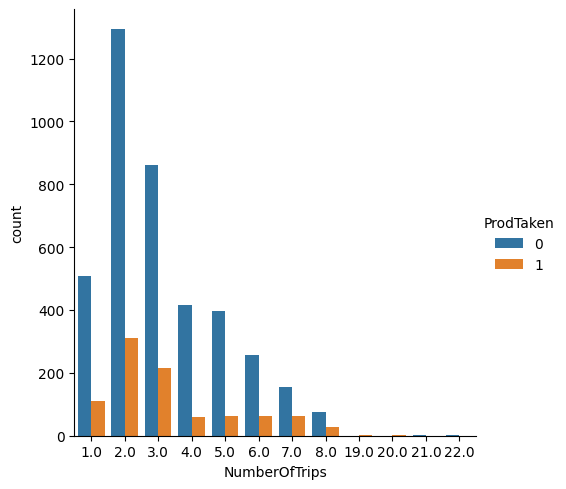

In [ ]:
sns.catplot(x='NumberOfTrips',hue='ProdTaken',data=data,kind="count")

Most of the customers buying the product chose their number of trips to be 2.

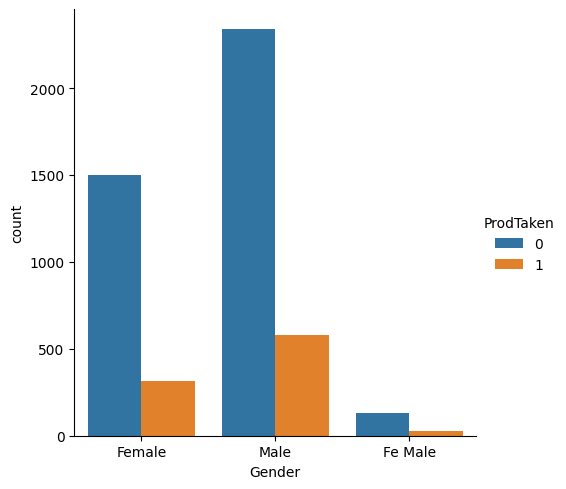

In [ ]:
sns.catplot(x='Gender',hue='ProdTaken',data=data,kind="count")

The data shows that men take the travel package more than women do.

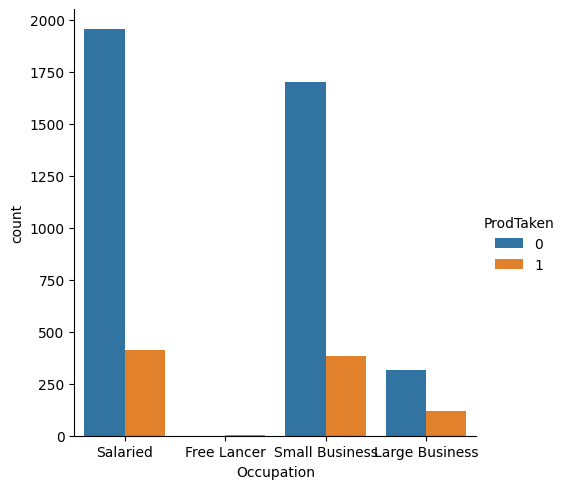

In [ ]:
sns.catplot(x='Occupation',hue='ProdTaken',data=data,kind="count")

*   Salried customers and Small-scaled businessmen are seen to buy the package more, hence they can be our target customer.
*   Free Lancers are the least targetable customers.



#Modelling


---



In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import gc
import warnings
warnings.filterwarnings('ignore')

We know that our target variable(y) is whether the customer takes the product or not, and the rest of the features are input variables(X).

In [ ]:
X = data.drop(['ProdTaken'], axis = 1)
y = data['ProdTaken']

Splitting the data:

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X ,y,test_size=0.2,random_state=1)

We need to convert all the variables into numeric datatype for the convinience of classification.

In [ ]:
data['Occupation'].replace({'Salaried':1.0,'Free Lancer':2.0,'Small Business':3.0,'Large Business':4.0},inplace=True)
data['Gender'].replace({'Female':1.0,'Male':2.0},inplace=True)
data['ProductPitched'].replace({'Deluxe':1.0,'Basic':2.0,'Standard':3.0,'Super Deluxe':4.0,'King':5.0},inplace=True)
data['MaritalStatus'].replace({'Single':1.0,'Married':2.0,'Divorced':3.0,'Unmarried':4.0},inplace=True)
data['Designation'].replace({'Manager':1.0,'Executive':2.0,'Senior Manager':3.0,'AVP':4.0,'VP':5.0},inplace=True)

In [ ]:
data["Occupation"] = pd.to_numeric(data["Occupation"], downcast="float")
data["Gender"] = pd.to_numeric(data["Gender"], downcast="float")
data["ProductPitched"] = pd.to_numeric(data["ProductPitched"], downcast="float")
data["MaritalStatus"] = pd.to_numeric(data["MaritalStatus"], downcast="float")
data["Designation"] = pd.to_numeric(data["Designation"], downcast="float")
print(data.dtypes)

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                 int64
CityTier                      int64
DurationOfPitch             float64
Occupation                  float32
Gender                      float32
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched              float32
PreferredPropertyStar       float64
MaritalStatus               float32
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                 float32
MonthlyIncome               float64
dtype: object


As we had seen previously, only 18.8% of the customers buy the holiday package and the rest of the 81.2% don't.
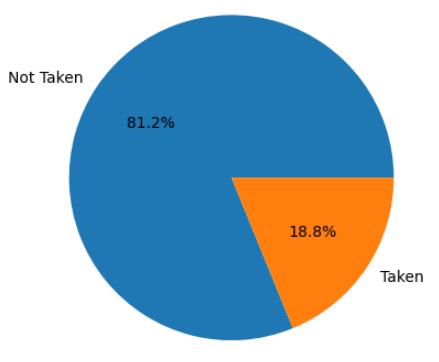

This means that we are dealing with a highly imbalanced data.Hence we use Random Forest classifier model here which is apt for dealing with data with imbalance.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

RForest = RandomForestClassifier().fit(X_train, y_train)
preds = RForest.predict(X_test)
print('accuracy', metrics.accuracy_score(y_test, preds))
print('recall', metrics.recall_score(y_test, preds))
print('precision', metrics.precision_score(y_test, preds))
print('f1-score', metrics.f1_score(y_test, preds))
print(classification_report(y_test, preds))

accuracy 0.9060190073917634
recall 0.5925925925925926
precision 0.9032258064516129
f1-score 0.7156549520766773
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       758
           1       0.90      0.59      0.72       189

    accuracy                           0.91       947
   macro avg       0.90      0.79      0.83       947
weighted avg       0.91      0.91      0.90       947



Our model shows an accuracy of around 90%

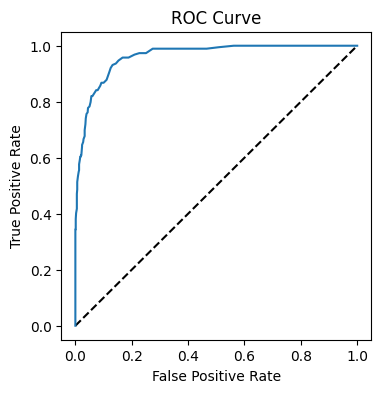

In [ ]:
y_scores = RForest.predict_proba(X_test)

fpr, tpr, thresholds =metrics.roc_curve(y_test, y_scores[:,1])

fig = plt.figure(figsize=(4, 4))

plt.plot([0, 1], [0, 1], 'k--')

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()